## Project desceiption

The analyses of current cituation and market confitions in Los Angeles based on open-source data of LA restaurants was made in order to evaluate the potential sucsess of opening of the new type of establishment - a small robot-run cafe.
The project seems to be is promising but expensive, so it was decided to attract the investors funds. One of the key points for investors is whether this project will be able to bring revenue when the novelty of robot waiters wears off.

The data available for analyses according to the description of Data are as follows:
- `id` - unique establishment ID 
- `object_name` - name of the establishment / chain name
- `address` - address of the establishment
- `chain` - does an establishment belong to chain (True/False)
- `object_type` - category of establishment
- `number` - number of seats.

## Initialization

In [1]:
# Importing libraries
! pip install altair
! pip3 install vega_datasets
! pip install -qq sidetable
! pip install plotly
! pip install usaddress
! pip install nbconvert
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import sidetable
import datetime as dt
from datetime import datetime
import scipy.stats as stats
import altair as alt
import plotly.express as px
from plotly import graph_objects as go
import usaddress
import os
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [2]:
data = pd.read_csv('/datasets/rest_data_us.csv')

## Exploaring data

In [3]:
display(data.head())
print(data.info())
display(data.describe())

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB
None


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


We have a dataset of 9651 rows and 6 columns. The dataset seems to containg missing values. All column names are spelled properly, the data types in all columns, except the `chain` one are correct. The `chain` column seems to contain boolean type data. Now we can check the data for impossible and duplicate values.

In [4]:
# Checking unique values in 'object_type' colimn
print(data['object_type'].unique())

['Cafe' 'Restaurant' 'Fast Food' 'Bakery' 'Bar' 'Pizza']


We got five popular categories of establishments in the column; from fast food to fine dining.

In [5]:
# Checking unique values in the 'chain' column
print(data['chain'].unique()) #.tolist())

[False True nan]


The column contains only two values: `True` and `False`, thus we can change the data type to Boolean.

## Fixing raw data

In [6]:
# Changing the data type in the 'chain' column 
data['chain'] = data['chain'].astype('bool') 

# Checking the general info of the dataset and data sample
print(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB
None


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


In [7]:
# Checking for duplicates
print('Number of duplicated entries in the dataset: ', len(data)- len(data.drop_duplicates()))

Number of duplicated entries in the dataset:  0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


**We have no duplicates entries in our dataset.  
All issues have been fixed and we can start our analyses.**

## Investigating the proportions of the various types of establishments. 

In [9]:
# Preparing data for the pie chart
type_pie = data['object_type'].value_counts().to_frame().reset_index()
display(type_pie)

,index,object_type
0,Restaurant,7255
1,Fast Food,1066
2,Cafe,435
3,Pizza,320
4,Bar,292
5,Bakery,283


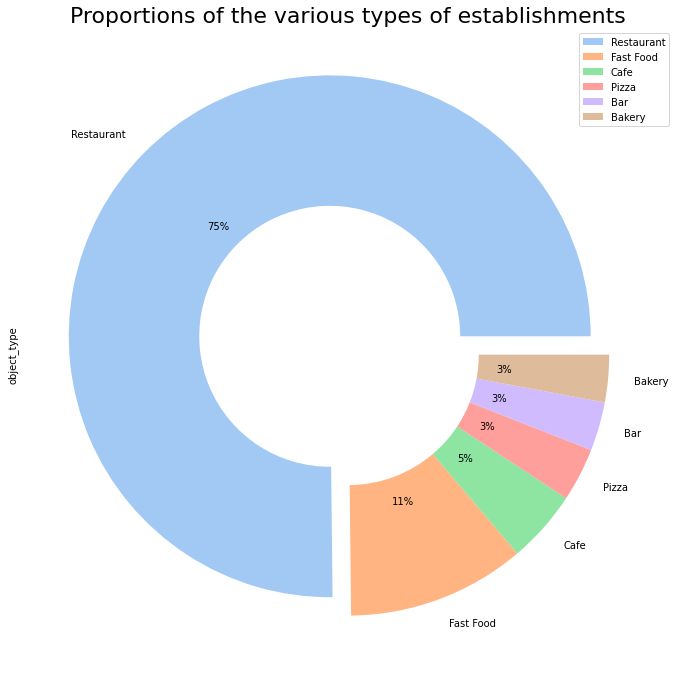

In [10]:
# Plotting the pie chart with proportion
sns.set_palette('pastel')
labels = type_pie['index'].tolist()
explode_type = [0.1, 0, 0, 0, 0, 0]
type_pie.plot(
            kind='pie', 
            y='object_type',
            labels=labels, 
            figsize=(12, 12), 
            autopct='%.0f%%', 
            explode=explode_type, 
            wedgeprops=dict(width=0.5))
plt.title('Proportions of the various types of establishments', fontsize= 22)
plt.show()

**We can see that 3/4 of the market in Los Andgeles in our dataset is occupied by restaurants, 11% - by fast food establishments. The third place hold the cafes with 5%. The rest 3 types holds around 3% of the market each.** 

## The proportions of chain and nonchain establishments. 

In [11]:
# Preparing data for the graph
grouped_by_chain = data.groupby(['chain', 'object_type'])['id'].nunique().reset_index()
display(grouped_by_chain)

# Calculating proportion of chai/non-chain establishments 
print('Proportion of chain to non-chain establishments: ', 
      len(data.query('chain == True'))/len(data))

,chain,object_type,id
0,False,Bar,215
1,False,Cafe,169
2,False,Fast Food,461
3,False,Pizza,166
4,False,Restaurant,4961
5,True,Bakery,283
6,True,Bar,77
7,True,Cafe,266
8,True,Fast Food,605
9,True,Pizza,154


Proportion of chain to non-chain establishments:  0.3812040203087763


In [12]:
#Plotting the grapgh with proportion
alt.Chart(grouped_by_chain).mark_bar(size=30).encode(
                                                    x=alt.X('sum(id)', 
                                                    stack='normalize'),
                                                    y='object_type', 
                                                    color ='chain').properties(
                                                             height=350, 
                                                             width=650, 
                                                             title='Proportions of chain and nonchain establishments')

alt.Chart(...)

**Overall 72% of all establishments in LA do not belong to any chain. But within types the situation is quit different.  
The Bakery type establishment is always a chain member. From the other hand - Bars (73%) and Restaurants(68%) are independent entities a bit less, than 3/4 and over 2/3 cases respectively. Pizzerias are aproximately half a chain members vs half of independant entities. Fast Food and Cafes in most cases are the chain members - 57% and 62% respectively.**

## Which type of establishment is typically a chain?

**Backery is a typical chain establishment in LA. There were no independents Иackeris found in the dataset.**

## What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?


In [13]:
# Checking general statistics
data_chain = data.query('chain == True')
data_non_chain = data.query('chain == False')
display(data_chain.describe())
display(data_non_chain.describe())

,id,number
count,3679.000000,3679.000000
mean,16628.466159,39.675455
std,2747.716203,43.426312
min,11794.000000,1.000000
25%,14284.000000,13.000000
50%,16628.000000,25.000000
75%,19020.500000,44.000000
max,21436.000000,229.000000


,id,number
count,5972.000000,5972.000000
mean,16600.240121,46.171467
std,2809.736870,49.875746
min,11786.000000,1.000000
25%,14158.750000,14.000000
50%,16598.500000,28.000000
75%,19026.250000,47.000000
max,21435.000000,229.000000


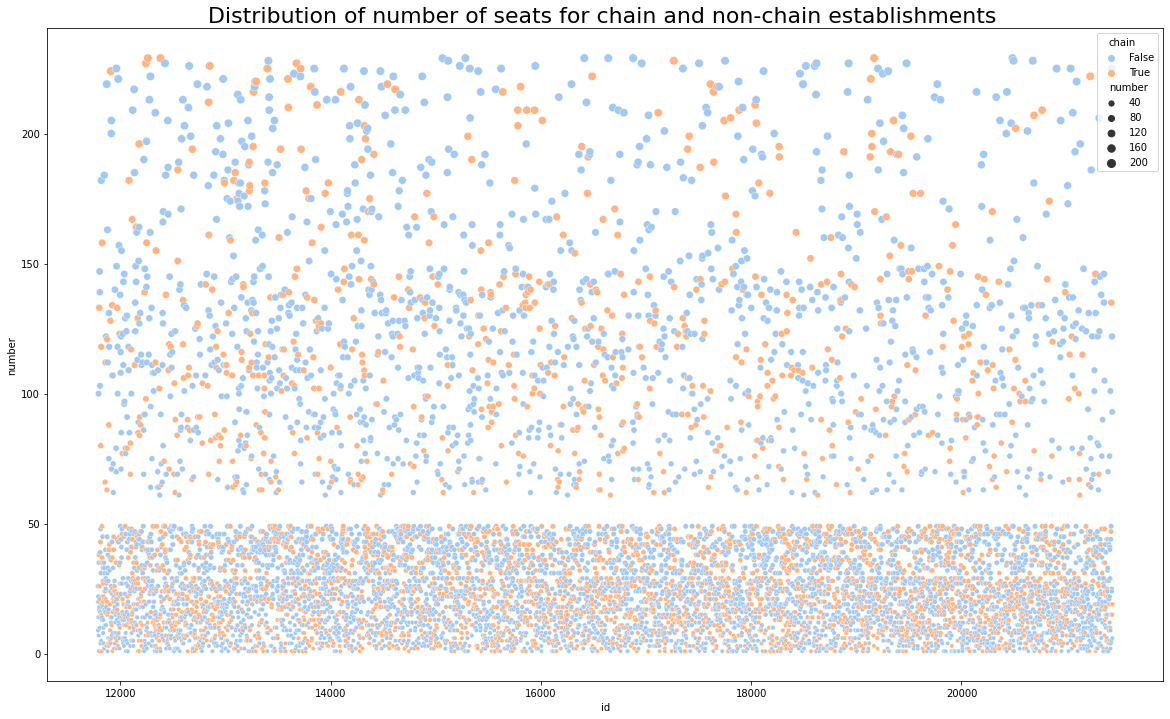

In [14]:
# Plotting the scatter plot with general distribution of number of seats
plt.figure(figsize=(20, 12))
sns.scatterplot('id', 'number', data=data, hue='chain', size='number')
plt.title('Distribution of number of seats for chain and non-chain establishments ', fontsize= 22 )
plt.show()

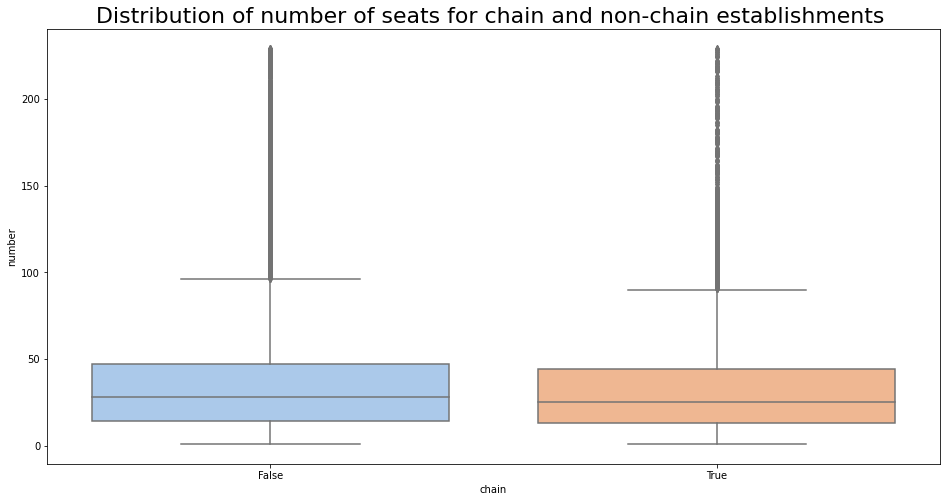

In [15]:
# Plotting the graph with general distribution of number of seats
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='chain', y='number')
plt.title('Distribution of number of seats for chain and non-chain establishments ', fontsize= 22 )
plt.show()

**Based on the overall statistics and graphs we can't say that there is any significant difference between chain and non chain entities. There are 3 major benchmarks regarding number of seats: 30, 50 and 230 in total. More than 75% of both chain and non chain establishments have less, that 50 seat. There is also a big gap in number of establishments uunder 30 and over 30 seats. This limits may be affected by local tax, sanitary and/or ecological limitations, imposed by local authorities. But it is much interesting to look at this proportions for each `object_type`.**

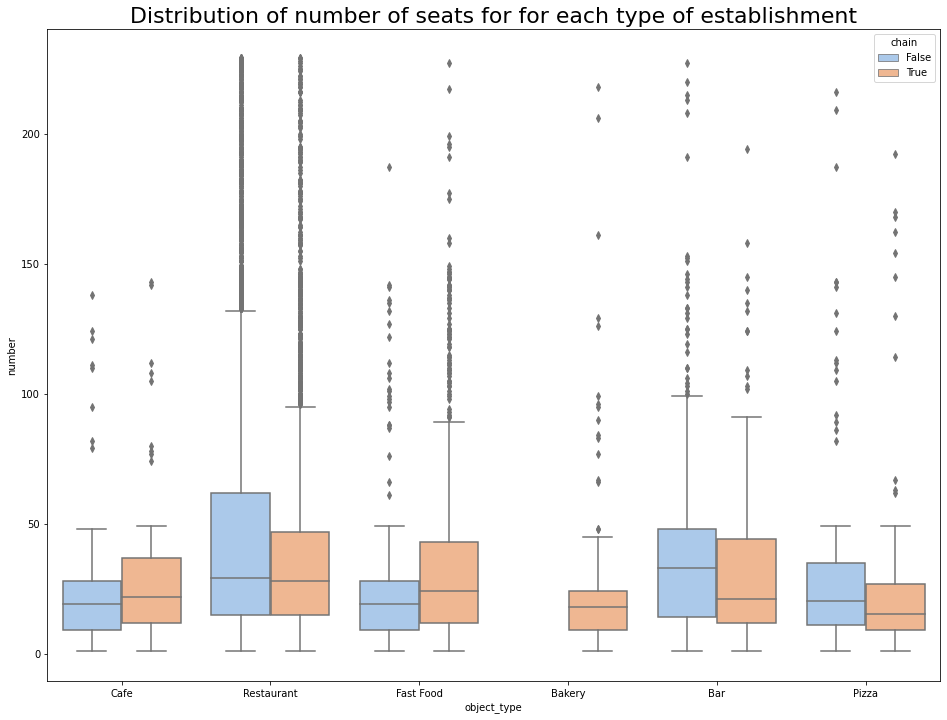

In [16]:
# Plotting the graph with general distribution of number of seats per each type
plt.figure(figsize=(16,12))
#plt.ylim([0, 150])
sns.boxplot(data=data, x='object_type', y='number', hue='chain')
plt.title('Distribution of number of seats for for each type of establishment', fontsize= 22 )
plt.show()

**The boxplots per each `object_type` give us much more information about chain characteristics in each category of establishments:**
1. For Cafe and Fast Food chains have more establishments with larger amount of seats than non-chain. The difference is much more seen fo Fast Food chains.
2. For Bars and Pizzerias the situation is vice versa: chains have relatively smaller amount of establishments with lower number of seats.  
3. Non-chain Restaurants have more entities with more seats, while the medians for both chain and non-chain are approximately the same.

## The average number of seats for each type of restaurant.

In [17]:
# Preparing data for plotting the graph
seats = data.groupby('object_type')['number'].mean().sort_values(ascending=False).reset_index()
emoji_dict = {'Bakery' : '🥐', 'Fast Food' : '🌭', 'Bar' : '🍹', 'Cafe' : '🥗', 'Pizza' : '🍕', 'Restaurant' : '🍽️'}
seats['emojis'] = seats['object_type'].apply(lambda x: emoji_dict.get(x))
display(seats)

,object_type,number,emojis
0,Restaurant,48.042316,🍽️
1,Bar,44.767123,🍹
2,Fast Food,31.837711,🌭
3,Pizza,28.459375,🍕
4,Cafe,25.000000,🥗
5,Bakery,21.773852,🥐


In [18]:
# Plotting the graph
bar = alt.Chart(seats).mark_bar().encode(
    x='object_type',
    y='number',
    color='object_type',
    text='object_type',
).properties(height=500, width=600, title='Average number of seats per establishment')

text = alt.Chart(seats).mark_text(align='center', size = 30).encode(
    x='object_type',
    y='number',
    text='emojis',
).properties(width=600, height=500)
bar + text

alt.LayerChart(...)

**Restaurants have the greatest average number of seats (48) followed by Bars (45), Fast Food (32), Pizza (28), Cafe (25) and Bakeries (22).** 

## Extracting street names from the address to a separate column.

In [19]:
# Defining function to check the incorrect addresses
def address_check(data):
    raw_address=usaddress.parse(data)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})   
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'

# Applying function
data['address_check']=data.address.apply(address_check)
data[data['address_check']=='no street or number']

,id,object_name,address,chain,object_type,number,address_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


We got problems with Olvera street (house number follows street name) and Los Angeles street (an 1/2 between house number and street name)

In [20]:
# Defining function to 'street_address' column
def street_address(data):
    #clean_address = 0
    if data.startswith('OLVERA'):
        clean_address='99999 OLVERA'
    elif data.startswith('1033 1/2 LOS ANGELES'):
        clean_address='99999 LOS ANGELES'
    else:
        raw_address=usaddress.parse(data)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_address=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])
    return clean_address

# Applying function to DF
data['street_address']=data.address.apply(street_address)

# Checking the result
display(data.head())

,id,object_name,address,chain,object_type,number,address_check,street_address
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,3708 ROCK,3708 ROCK
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,100 WORLD,100 WORLD
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,6801 HOLLYWOOD,6801 HOLLYWOOD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,1814 SUNSET,1814 SUNSET
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,2100 PARK,2100 PARK


Now we have correct addresses in `street_address` column: starting with 'AddressNumber', following by 'StreetName'. We can cut off 'AddressNumber' to leave only 'StreetName' in `street` column.

In [21]:
# Cutting off the 'AddressNumber'.
data['street'] = data['street_address'].map(lambda x: x[x.find(' ') + 1:])
data.head(10)

# Checking the problem entries
data.query('street == "OLVERA" or street == "LOS ANGELES"')

,id,object_name,address,chain,object_type,number,address_check,street_address,street
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number,99999 OLVERA,OLVERA
2533,14319,EL PASEO INN,11 E OLVERA ST,False,Restaurant,91,11 OLVERA,11 OLVERA,OLVERA
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number,99999 OLVERA,OLVERA
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number,99999 LOS ANGELES,LOS ANGELES
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number,99999 OLVERA,OLVERA
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number,99999 OLVERA,OLVERA
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number,99999 OLVERA,OLVERA
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number,99999 OLVERA,OLVERA
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number,99999 OLVERA,OLVERA
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number,99999 OLVERA,OLVERA


**Now all problems with street address are fixed.**

## The top ten streets by number of restaurants.

In [22]:
# Preparing data for plotting
data_rest = data.query('object_type == "Restaurant"')
rest_street = data_rest.groupby('street').agg({'id' : 'count'}).reset_index().sort_values(by='id', ascending=False)

# Defining function to show numbers on top of each bar
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

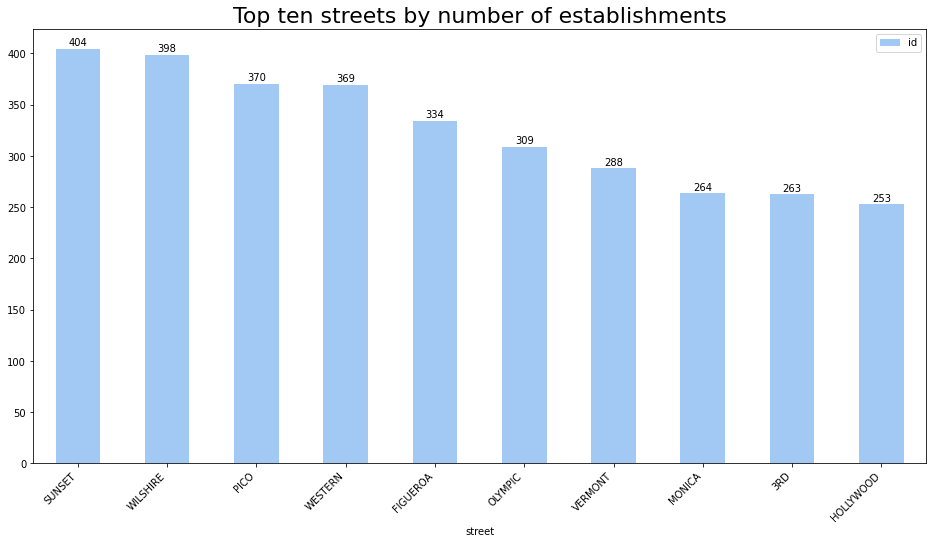

In [23]:
# Plotting the barchart
sns.set_palette('pastel')
fig = data.groupby('street').agg({ 'id' : 'nunique'}).sort_values(
    by='id', 
    ascending=False).reset_index().head(10).plot.bar(
                                                    x = 'street', 
                                                    alpha=1, 
                                                    figsize=(16,8)) 
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
show_values(fig)
plt.title('Top ten streets by number of establishments', fontsize= 22 )
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Your results are correct. Also, nice choice of graph and format.

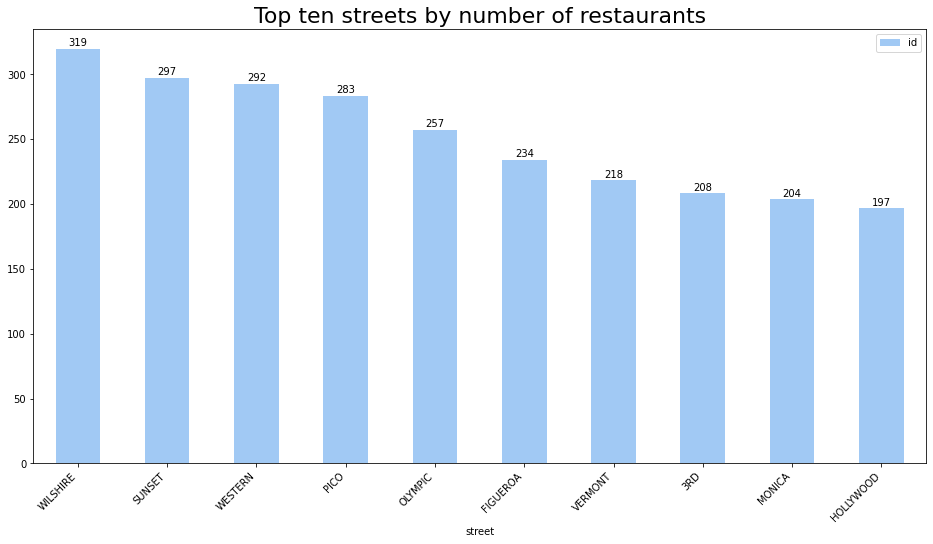

In [24]:
# Plotting the barchart
fig = data_rest.groupby('street').agg({ 'id' : 'nunique'}).sort_values(
    by='id', 
    ascending=False).reset_index().head(10).plot.bar(
                                                    x = 'street', 
                                                    alpha=1, 
                                                    figsize=(16,8)) 
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
show_values(fig)
plt.title('Top ten streets by number of restaurants', fontsize= 22 )
plt.show()

**Sunset and Wilshire Boulevards together Western Avenue boast the highest number of establishments of any kind. Wilshire is leading in the number of restaurants.**

## The number of streets that only have one restaurant.

In [25]:
# Calculating number of streets
total_streets = len(data['street'].unique())
establishment_street = data.groupby('street').agg({'id' : 'count'}).reset_index().sort_values(
    by='id', ascending=False)
one_establishment = len(establishment_street.query('id == 1'))
                    
print('Number of streets with only 1 establishment: ', one_establishment)
print('Share of streets with only 1 establishment: ', int((one_establishment/total_streets)*100))

Number of streets with only 1 establishment:  185
Share of streets with only 1 establishment:  40


In [26]:
# Calculating number of streets
one_restaurant = len(rest_street.query('id == 1'))
                    
print('Number of streets with only 1 restaurant: ', one_restaurant)
print('Share of streets with only 1 restaurant: ', int((one_restaurant/total_streets)*100))

Number of streets with only 1 restaurant:  178
Share of streets with only 1 restaurant:  38


**185 streets (40% of all streets in the dataset) have just one establishment.**  
**178 streets (38% of all streets in the dataset) have just one restaurant.**

## The distribution of the number of seats for streets with a lot of restaurants

In [27]:
# Calculating percintiles for the number of establishments per street
np.percentile(establishment_street['id'], [80, 90, 95, 99])

array([ 20.4,  57. , 100.4, 319.5])

We can choose 95 percintile, which is pretty close to 100, as a criterion for the further furher calculations regarding the amount of establishments located on the street. The rest 5% of streets have the largest amount of establishments in the range of 100 to 229. 

In [28]:
# Calculationg the limit and the list of streets
limit = np.percentile(establishment_street['id'], 95)
streets_list_filtered = establishment_street.query('id > @limit')['street'].tolist()
data_filtered = data.query('street in @streets_list_filtered')

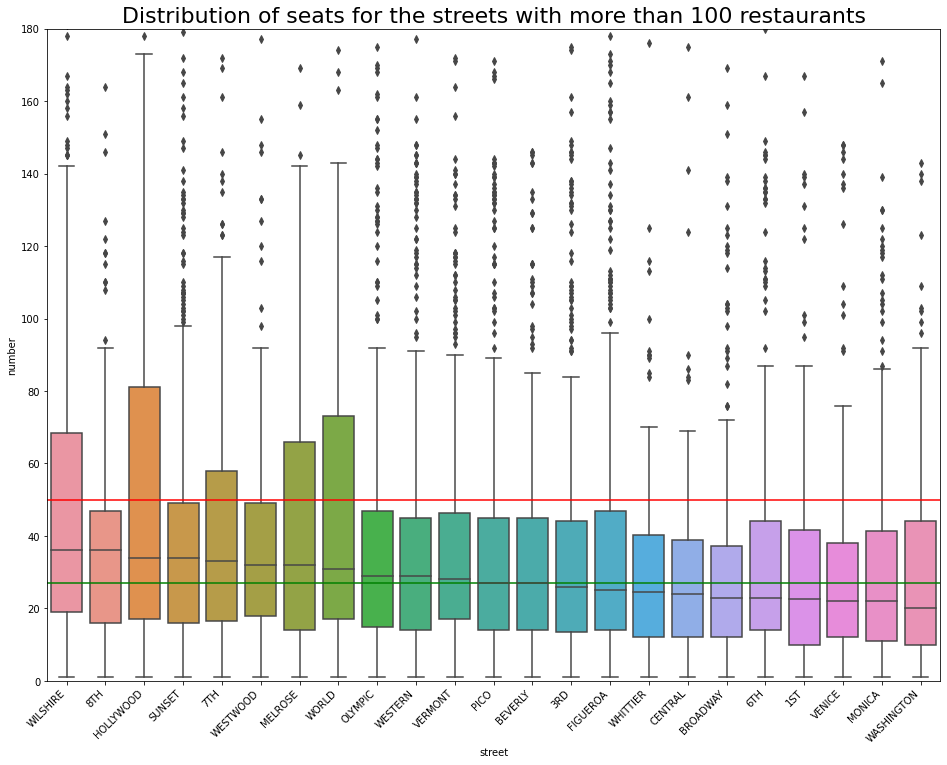

In [29]:
# Plotting the graph for the most popular streets
median_total = data['number'].median()
plt.figure(figsize=(16,12))
plt.ylim([0, 180])
my_order=data_filtered.groupby(['street'])['number'].median().sort_values(ascending=False)
graph = sns.boxplot(
                    data=data_filtered, 
                    x='street', 
                    y='number', 
                    order=my_order.index)
plt.title('Top ten streets by number of restaurants', fontsize= 22 )
graph.set_xticklabels(
                    graph.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
plt.axhline(y=50, color = 'r')
plt.axhline(y=median_total, color = 'green')
plt.title('Distribution of seats for the streets with more than 100 restaurants', fontsize= 22 )
plt.show()

Wilshire Boulevard, having the largest amount of Restaurants and the second biggest amount of total establishments got the highest median number. 

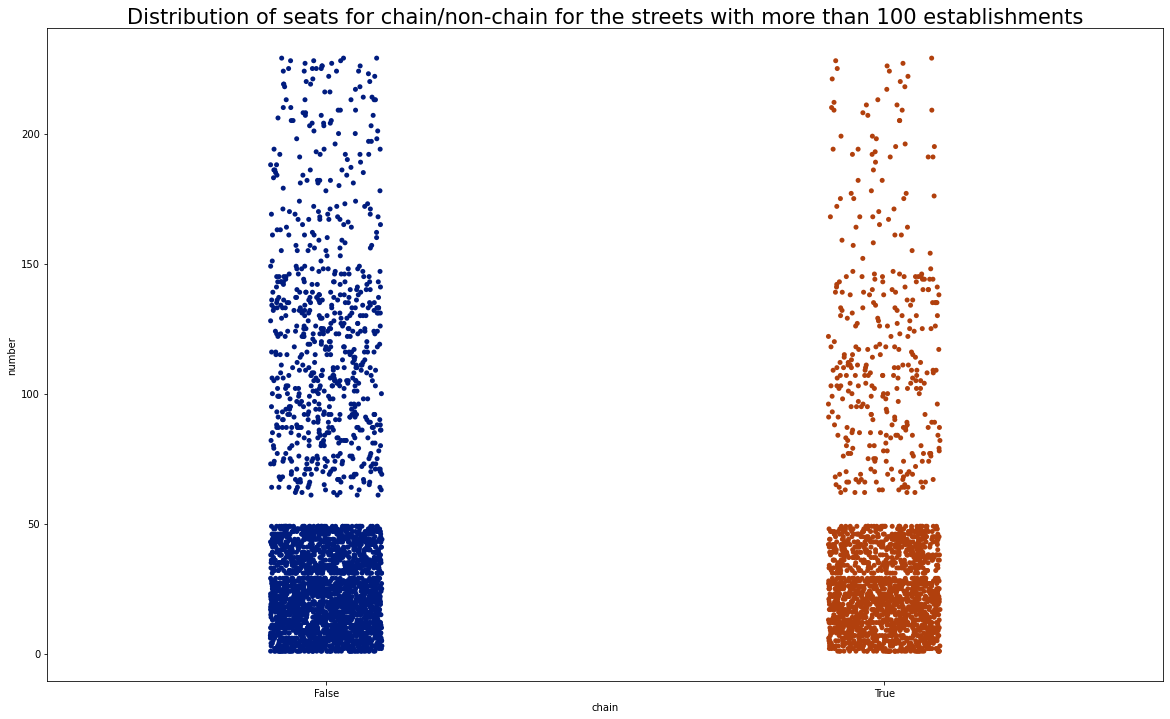

In [30]:
plt.figure(figsize=(20,12))
sns.set_palette('dark')
graph = sns.stripplot(x="chain", y="number", data=data_filtered)
plt.title('Distribution of seats for chain/non-chain for the streets with more than 100 establishments', fontsize= 21 )
plt.show()

Visually the distribution of non-chain establishment is a bit more dense than for chain ones. The difference should be much more clearly seen per each category.

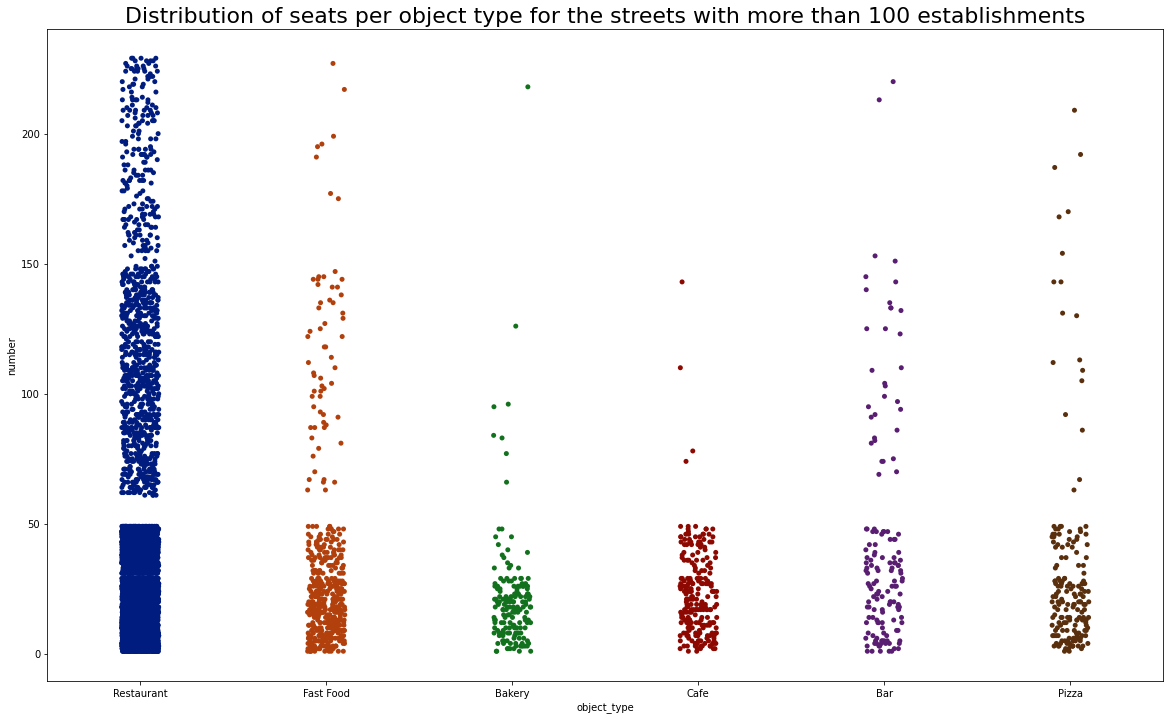

In [31]:
plt.figure(figsize=(20,12))
graph = sns.stripplot(x="object_type", y="number", data=data_filtered)
plt.title('Distribution of seats per object type for the streets with more than 100 establishments', fontsize= 22 )
plt.show()

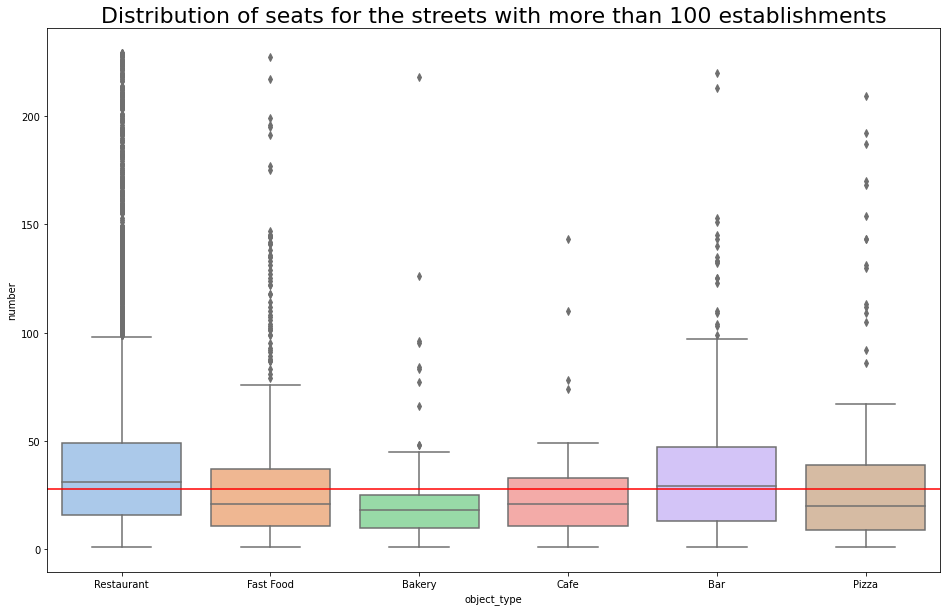

In [32]:
# Plotting a boxplot
median_total = data_filtered['number'].median()
plt.figure(figsize=(16,10))
sns.set_palette('pastel')
sns.boxplot(
            data=data_filtered, 
            x='object_type', 
            y='number')
plt.title('Top ten streets by number of restaurants', fontsize= 22 )
plt.axhline(y=median_total, color = 'r')
plt.title('Distribution of seats for the streets with more than 100 establishments', fontsize= 22 )
plt.show()

Without breakedown into chain and non-chain establishments Restaraunts and Bars visually have more seating capacity within 50 seats limit than all other catgories of establishments. Bars' median vlue is pretty much close to average median across the dataset. Let's see what happens when we break them by the chain/non chain categories.

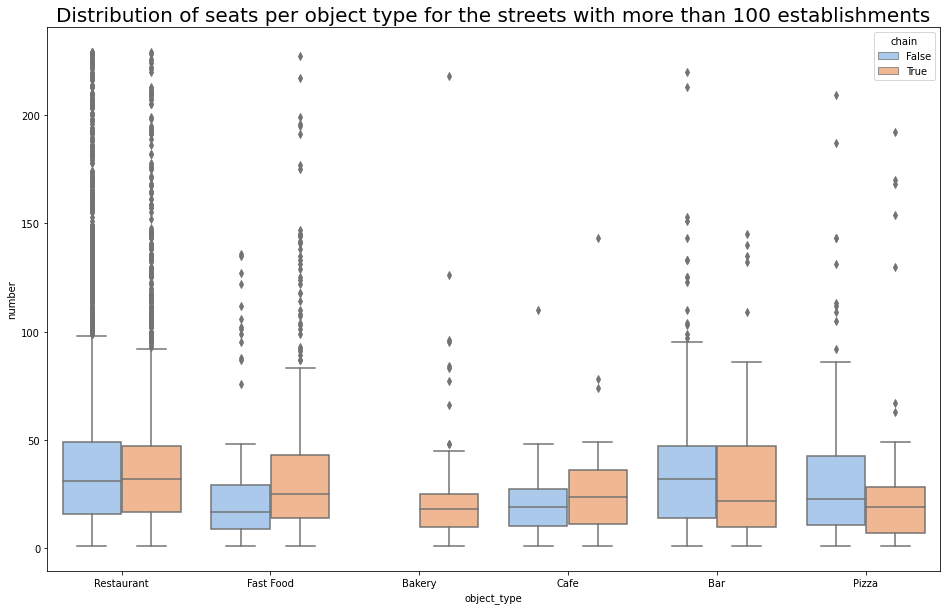

In [33]:
# Plotting the boxplots
plt.figure(figsize=(16,10))
sns.boxplot(
            data=data_filtered, 
            x='object_type', 
            y='number', 
            hue='chain')
plt.title('Distribution of seats per object type for the streets with more than 100 establishments', fontsize= 20 )
plt.show()

For the most popular streets there is almost no difference for the seating distribution between chain and non-chain entities for Restaurants. Independant Fast Food and Cafe entities are visually smaller and less presented than chain members. Fast Food chain members 3d quartile is close to the 50 seats, while non-chain 3d quartile slightly esceedes chain median. The situation is completely different for Pizzerias: independent entities are bigger and are much more presented on this streets. This is generally true also and for the Bars, although they are also limited by 49 seats for 75% of distribution for both chain and non-chain establishments.    


## Number of Cafe type eastablishments on the streets with a lot of restaurants

In [34]:
# Calculating pivot table for graph
data_cafe = data_filtered.pivot_table(
                                    index='street', 
                                    columns=['chain', 'object_type'], 
                                    values='id', 
                                    aggfunc=('count'), 
                                    margins=True).reset_index()
# Renaming columns
data_cafe.columns = ['street', 'Bar', 'Cafe', 'Fast_Food', 'Pizza', 'Restaurant', 'chain_Bakery', 'chain_Bar',
                      'chain_Cafe', 'chain_Fast_Food', 'chain_Pizza', 'chain_Restaurant', 'total']
# Cheking that everything is correct
data_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   street            24 non-null     object 
 1   Bar               22 non-null     float64
 2   Cafe              22 non-null     float64
 3   Fast_Food         23 non-null     float64
 4   Pizza             24 non-null     float64
 5   Restaurant        24 non-null     float64
 6   chain_Bakery      24 non-null     float64
 7   chain_Bar         17 non-null     float64
 8   chain_Cafe        23 non-null     float64
 9   chain_Fast_Food   24 non-null     float64
 10  chain_Pizza       20 non-null     float64
 11  chain_Restaurant  24 non-null     float64
 12  total             24 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 2.6+ KB


In [35]:
# Calculating columns with percentage of Cafes on the streets
data_cafe = data_cafe.fillna(0)
data_cafe['cafe_pct'] = (data_cafe['Cafe'] / data_cafe['total'])*100
data_cafe['chain_cafe_pct'] = (data_cafe['chain_Cafe'] / data_cafe['total'])*100
data_cafe = data_cafe[['street', 'Cafe', 'cafe_pct', 'chain_Cafe', 'chain_cafe_pct']].head(22)

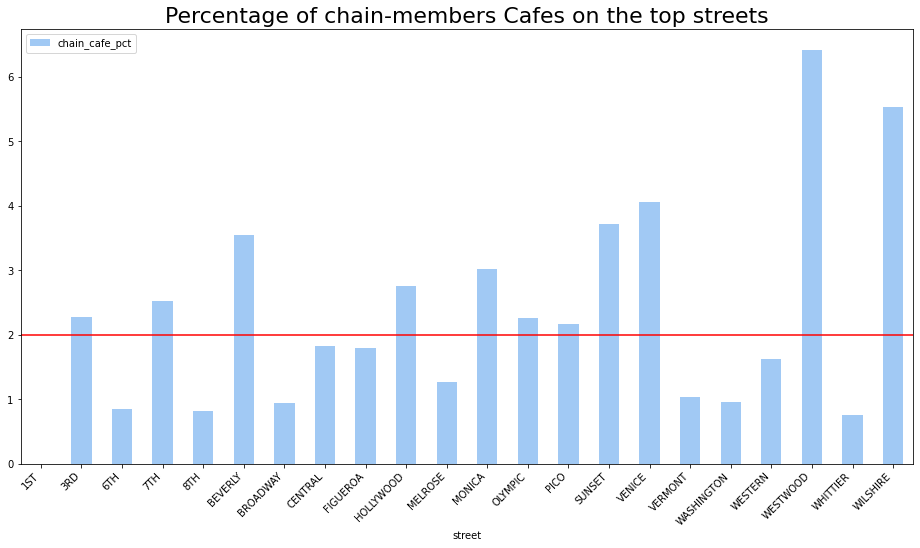

Percentage of non-chain members Cafe:  0.027561910682830794


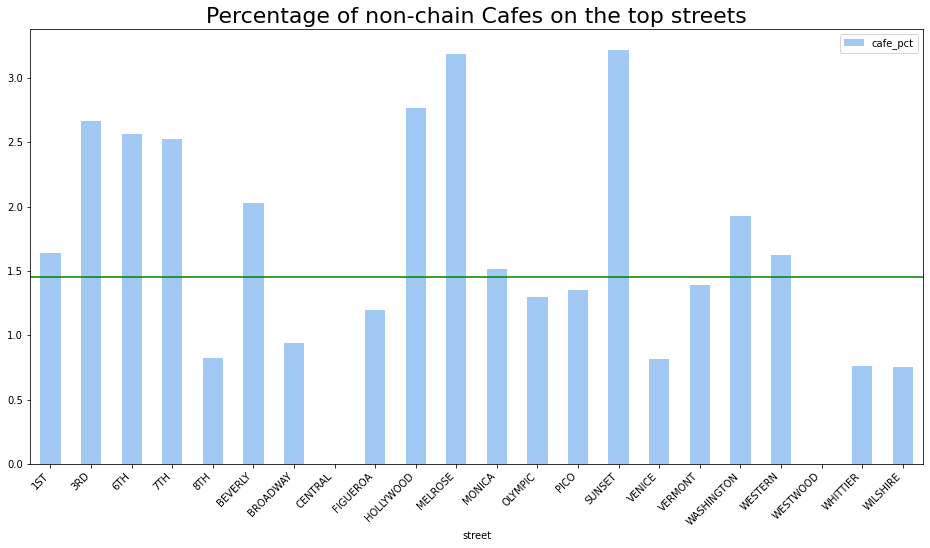

Percentage of chain members Cafe:  0.017511138742099263


In [36]:
# Plotting the graph for non-chain Cafes
median_chain = data_cafe['chain_cafe_pct'].median()
median_non_chain = data_cafe['cafe_pct'].median()

graph = data_cafe.plot.bar(x='street', y='chain_cafe_pct', alpha=1, figsize=(16,8))
graph.set_xticklabels(
                    graph.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
plt.axhline(y=median_chain, color = 'r')
plt.title('Percentage of chain-members Cafes on the top streets', fontsize= 22 )
plt.show() 

print('Percentage of non-chain members Cafe: ', 
      len(data.query('object_type == "Cafe" and chain == True')['id'].unique())/len(data['id'].unique()))

# Plotting the graph for non-chain Cafes
graph = data_cafe.plot.bar(
                            x='street', 
                            y='cafe_pct', 
                            alpha=1, 
                            figsize=(16,8))
graph.set_xticklabels(
                    graph.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
plt.axhline(y=median_non_chain, color = 'green')
plt.title('Percentage of non-chain Cafes on the top streets', fontsize= 22 )
plt.show() 


print('Percentage of chain members Cafe: ', len(data.query(
    'object_type == "Cafe" and chain == False')['id'].unique())/len(data['id'].unique()))

For both chain and non-chain establishments there are streets where the number of entries is much less than average amount for the relevant category across the dataset and even streets with 0 establishments. This streets seems to be preffered locations for the opening of a new establishment.

## Conclusion

We analyzed single file dataset of 9651 rows and 6 columns. The dataset contained no missing values and duplicate entries. 
  
The distribution and the pie chart showed that that 75% of the market in Los Andgeles is occupied by reataurants, 11% - by fast food establishments. The third place hold the cafes with 5%. The rest 3 types holds around 3% of the market each.

Overall 72% of all establishments in LA do not belong to any chain. But within types the situation was found different:  
- The Bakery type establishment is always a chain member.
- 73% of Bars and 68% of Restaurants are independent entities.
- Pizzerias are aproximately half a chain members vs half of independant entities.
- 57% of Fast Food and 62% of Cafes are the chain members.

Based on the overall ststistics and graph of total number of seats distribution between chain and non-chain establishments  we can't say that there is any significant difference between chain and non chain entities. There are 3 major benchmarks regarding number of seats: 30, 50 and 230 seats. More than 75% of both chain and non-chain establishments have less, than 50 seat. There is also a big gap in number of establishments under 30 and over 30 seats. This limits may be affected by local tax, sanitary and/or ecological limitations, imposed by local authorities. 

The boxplots plotted per each `object_type` showed us much more information about chain characteristics in each category of establishments:
- For Cafe and Fast Food chains have more establishments with large amount of seats than non-chain. The difference is much cleary seen fo Fast Food chains.
- For Bars and Pizzerias the situation is vice versa - chains have relatively smaller amount of establishments with lower amount of seats.
- Non-chain Restaurants have more entities with large amount of seats, while the median values for both chain and non-chain are approximately the same.

Regarding average amount of seats per establishment Restaurants have the greatest average value (48 seats) followed by Bars (45), Fast Food (32), Pizza (28), Cafe (25) and Bakeries (22).

Sunset (404) and Wilshire (398) Boulevards together Western Avenue (370) boast the highest number of establishments of all kinds. Wilshire Boulevard is the leading street in the number of Restaurants located on it (319).

At the same 185 streets (40% of all streets in the dataset) have just one establishment (178 streets (38% of all streets in the dataset) have just one restaurant.

For the most popular streets with a large number of entities there is almost no difference for the seating distribution between chain and non-chain entities for Restaurants. Independant non-chain Fast Food and Cafe entities are visually smaller and less presented than chain members. Fast Food chain members greately outnumber the non-chain establishment (median of chain membres is not much less than 3d quartile of independent entities). The sutiation is completally different for Pizzerias: independent entities are bigger and are much more presented on this streets. This is generally true also and for the Bars, although they are also limited by 49 seats for 75% of distribution for both chain and non-chain establishments.




Regarding the new Cafe type establishment with innovative waiters we should notice that we got no information about free rental space and rental rates as well as no information about free parking spaces on this streets. Data on average occupancy of the establishments were also unavailable for our analyses. But based on the analyses of distribution of number of seats between different categories and chains we can suggest the locations on the streets with high restaurant traffic and below average (or even zero) number of the same type entities, such as 1st street, Central street, Westwood Street (all 3 streets have no Cafes at all), as well as 6th, 8th streets and Broadway as locations for chain establishment or 8th, Whistler streets or Wilshire Boulevard - for the independent Cafe. If and when the novelty of robot waiters wears off this locations would have been generating good level of traffic and revenue.

Link to the presentation

https://docs.google.com/presentation/d/1atbQ-OWI9r3q6wkSH0qWLRTQiWL_oU_J/edit?usp=share_link&ouid=116354173118989210978&rtpof=true&sd=true